Import the required packages

In [84]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Keras will download and load the CIFAR-10 dataset

In [42]:
(image_train, labels_train), (image_test, labels_test) = cifar10.load_data()  

In [43]:
#Size of Training images
image_train.shape[0]

50000

In [44]:
#Size of Testing images
image_test.shape[0]

10000

In [45]:
class_labels = ("airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")

In [65]:
#Conversion of train and test image set from 4D array into 2D array
image_train_logit = image_train.reshape(50000, 32*32*3)
image_train_logit.shape
image_test_logit = image_test.reshape(10000, 32*32*3)
image_test_logit.shape

(50000, 3072)
(10000, 3072)


In [46]:
#Conversion of train and test labels set from 2D array into 1D array
labels_train = labels_train.reshape(-1,)
labels_test = labels_test.reshape(-1,)

In [47]:
#Normalise the image pixel range to be between 0 and 1
image_train = image_train / 255.0
image_test = image_test / 255.0

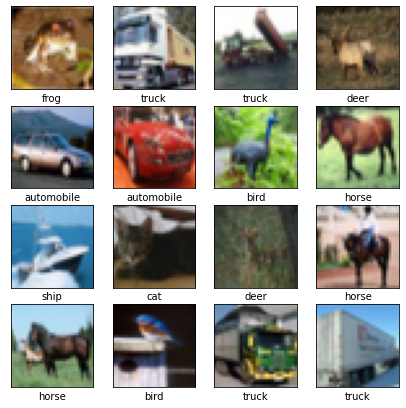

In [48]:
#Visualize sample images using a function

def sample_image(i):
  plt.figure(figsize=(7,7))
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_train[i])
    plt.xlabel(class_labels[labels_train[i]])
  plt.show()

sample_image(0)

# Logistic Regression

In [67]:
#Define the regression model with max interation of 500
classifier = LogisticRegression(random_state=0,tol=1e-5, max_iter= 500)

In [68]:
#Fit and train the model on training dataset
classifier.fit(image_train_logit, labels_train)

C:\Users\harsh\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=0, tol=1e-05)

In [72]:
#Label Prediction
label_pred_logit = classifier.predict(image_test_logit)

#Calculate Logistic Regression accuracy
print("Accuracy of Logistic Regression on CIFAR-10:",
      metrics.accuracy_score(labels_test, label_pred_logit))

Accuracy of Logistic Regression on CIFAR-10: 0.3942


# Convolution Neural Networks

In [49]:
#Define Number of class labels
n = len(set(labels_train))
print(n)

10


In [50]:
#Apply layers to the input dataset

#Input size for layers
input = image_train[0].shape

#Convolution + Pooling + Fully Connected layers
cnn_model = models.Sequential([
                layers.Conv2D(filters = 64, kernel_size= (3,3), 
                              padding = "same", activation = "relu", 
                              input_shape = input),
                layers.MaxPooling2D(pool_size=(2,2)),

                layers.Conv2D(filters = 128, kernel_size= (3,3),
                              padding = "same", activation = "relu"),
                layers.MaxPooling2D(pool_size=(2,2)),

                layers.Conv2D(filters = 256, kernel_size= (3,3), 
                              padding = "same", activation = "relu"),
                layers.MaxPooling2D(pool_size=(2,2)),

                #Dense Layers
                layers.Flatten(),
                layers.Dense(512, activation = "relu"),
                layers.Dense(n, activation = "softmax")
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [51]:
#Compile a model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
#Train a model
values = cnn_model.fit(image_train, labels_train, epochs = 10, validation_data =(image_test, labels_test))

Epoch 1/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.3310 - accuracy: 0.5187 - val_loss: 1.0558 - val_accuracy: 0.6163
Epoch 2/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.8689 - accuracy: 0.6947 - val_loss: 0.8088 - val_accuracy: 0.7157
Epoch 3/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.6746 - accuracy: 0.7637 - val_loss: 0.7542 - val_accuracy: 0.7441
Epoch 4/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.5286 - accuracy: 0.8155 - val_loss: 0.7718 - val_accuracy: 0.7365
Epoch 5/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.4082 - accuracy: 0.8555 - val_loss: 0.7922 - val_accuracy: 0.7564
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.2987 - accuracy: 0.8944 - val_loss: 0.8683 - val_accuracy: 0.7484
Epoch 7/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.2138 - accuracy: 0.9252 - val_loss: 1

In [59]:
#Training and testing loss and accuracy
pd.DataFrame(values.history)

,loss,accuracy,val_loss,val_accuracy
0,1.330957,0.51870,1.055775,0.6163
1,0.868914,0.69474,0.808804,0.7157
2,0.674589,0.76374,0.754204,0.7441
3,0.528607,0.81550,0.771775,0.7365
4,0.408155,0.85552,0.792230,0.7564
5,0.298748,0.89442,0.868349,0.7484
6,0.213838,0.92516,1.009705,0.7491
7,0.172006,0.93882,1.124255,0.7495
8,0.139249,0.95132,1.246559,0.7414
9,0.125291,0.95668,1.421436,0.7365


In [63]:
accuracy_test = cnn_model.evaluate(image_test, 
                                   labels_test,
                                   verbose=2)

313/313 - 3s - loss: 1.4214 - accuracy: 0.7365


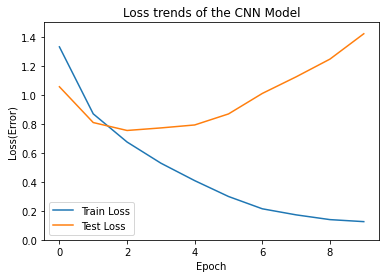

In [78]:
#Loss Vs Epoch
plt.plot(values.history['loss'])
plt.plot(values.history['val_loss'])
plt.title('Loss trends of the CNN Model')
plt.ylabel('Loss(Error)')
plt.xlabel('Epoch')
plt.ylim([0, 1.5])
plt.legend(['Train Loss', 'Test Loss'], loc='lower left')
plt.show()

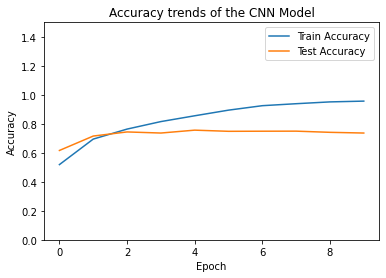

In [79]:
#Accuracy Vs Epoch
plt.plot(values.history['accuracy'])
plt.plot(values.history['val_accuracy'])
plt.title('Accuracy trends of the CNN Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1.5])
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right')
plt.show()